В цьому ДЗ ми потренуємось будувати візуалізації з використанням бібліотеки `maplotlib` для візуалізації даних в `pandas.DataFrame`.

# Опис бізнес задачі та набору даних

Набір даних "Yulu" містить інформацію про попит на спільні електровелосипеди в Індії, що надаються провідним індійським постачальником мікромобільності Yulu. Ця компанія пропонує унікальні транспортні засоби для щоденних поїздок з метою усунення транспортних заторів в Індії та забезпечення безпечного, зручного та доступного рішення для пересування. Зони Yulu розташовані в оптимальних місцях, включаючи станції метро, автобусні зупинки, офісні простори, житлові райони та корпоративні офіси, щоб полегшити поїздки на перші та останні кілометри.

Останнім часом Yulu зіткнулася зі значними зниженнями доходів, тому компанія звернулася до консалтингової фірми з метою зрозуміти, від яких факторів залежить попит на ці спільні електровелосипеди, особливо на індійському ринку.

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів


0. Імпортуйте бібліотеки `matplotlib.pyplot` та `pandas`


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1. Завантажте дані з файла `yulu_rental.csv` у pandas.DataFrame `df`.

In [5]:
df = pd.read_csv('/content/drive/MyDrive/data/yulu_rental.csv')

2. Виведіть

- перші 3 записи з набору даних
- типи даних в наборі даних
- розміри набору даних

In [6]:
df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [7]:
df.dtypes

,0
datetime,object
season,int64
holiday,int64
workingday,int64
weather,int64
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


In [8]:
df.shape

(10886, 12)

Перетворимо колонку `datetime` на тип даних `pd.datetime` - це нам доопоможе в подальшій роботі. Просто запустіть колонку нижче і занатуйте собі цей метод роботи з колонкою, в якій міститься дата і час.
Наша колонка тепер стане таймпстемпом і для неї став доступний функціонал, описаний тут

https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.html

Наприклад, ми можемо легко виокремити дату, день тижня, чи це робочий день, чи ні.

In [9]:
df['datetime'] = pd.to_datetime(df.datetime)

3. З допомогою matplotlib побудуйте найпростіший лінійний графік кількості зареєстрованих користувачів (`registered`) на кожну годину.

In [10]:
df['registered'] = df.registered

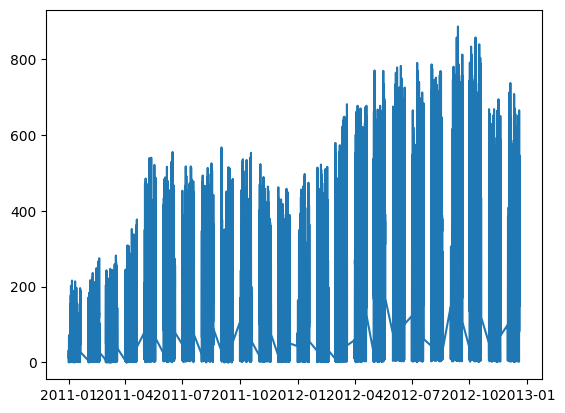

In [11]:
x = df.datetime
y = df.registered
plt.plot(x, y);

Має вийти щось таке:
![](https://drive.google.com/uc?export=view&id=1WX6s9qmiwq_1TSHQtRX0bPL8sT6Gw2BH)

4. Графік виглядає так собі, правда? Давайте загрегуємо дані по дням. Для цього запустіть наступний код аби створити колонку "дата" (без часу) і після цього напишіть самостійно код, аби загрегувати дані і отримати кількість зарестрованих клієнтів на день. Ваша фінальна структура (запишіть її в змінну `df_registered_by_date`) даних має містити дві колонки: дату і кількість зареєстрованих користувачів на цей день.

In [12]:
df['date'] = df.datetime.dt.date


In [14]:
df_registered_by_date = df.groupby('date')['registered'].sum().reset_index()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1DL7Y-R7_CBWNlQNAnMyAoU8hR2MdF5v7)


5. Тепер побудуйте лінійний графік з matplotlib для даних в `df_registered_by_date`.

  Додайте наступну частину до графіку аби зробити підписи за віссю ОХ більш читаємими

  `plt.xticks(rotation=45, ha='right')`

  Після побудови графіку проаналізуйте його та напишіть, які тенденції щодо зміни кількості зареєстрованих користувачів в часі ви бачите і чому так може бути?

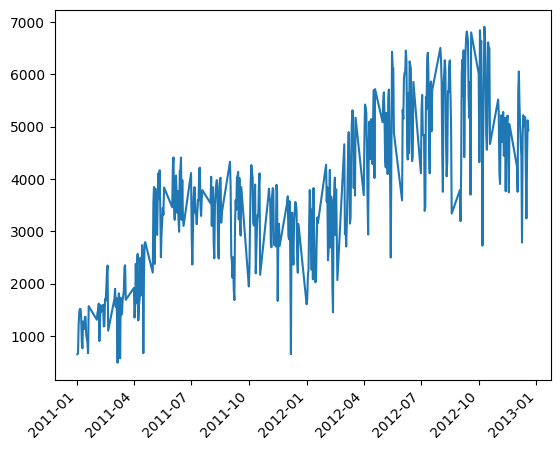

In [15]:
x = df_registered_by_date.date
y = df_registered_by_date.registered
plt.plot(x, y);
plt.xticks(rotation=45, ha='right');

Загально по графіку прослідковується тенденція до зростання кількості користувачів, при цьому не можна сказати, що він стабільний. Бачимо, що в різні періоди кількість користувачів то зменшується, то збільшується. Основні причини зменшення: найяскравіше це видно у січні 2012 року. Можна пов"язати з тим, що в цей період багато свят, люди просто відпочивають і потреба у транспорті менша. Щодо падінь в коротших проміжках - скоріше за все причина була в погоді у конкретні дні та через наявність вихідних/робочих днів.

6. Побудуйте графік розсіювання (scatterplot) між температурою і тим, як вона відчувається (atemp). Поставте прозорість точок 0.2. Додайте підписи до осей Х ат У. Опишіть свої спостереження з цього графіку. Які висновки можна зробити? Що дивного бачите?

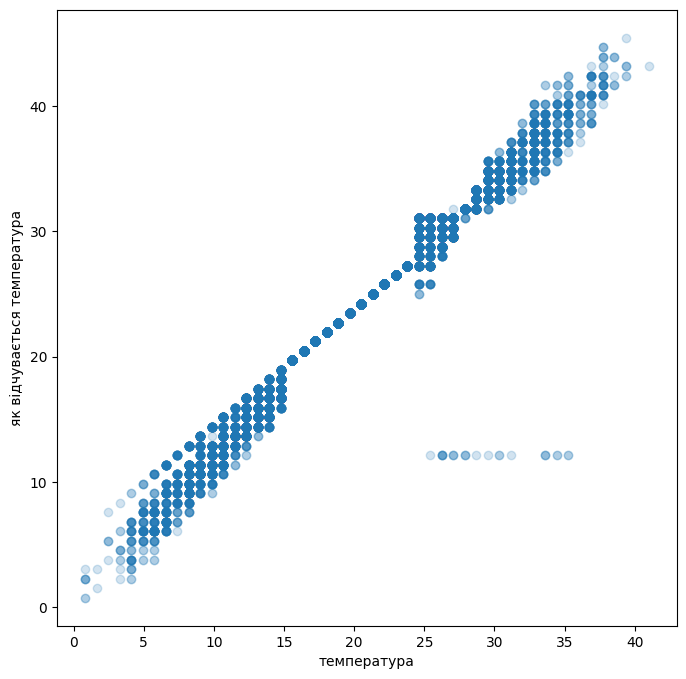

In [16]:
# побудуйте діаграми розсіювання для вдох інших колонок в цих даних
col_x = 'temp'
col_y = 'atemp'
plt.figure(figsize=(8,8))
plt.scatter(df[col_x], df[col_y], alpha=0.2),
plt.xlabel('температура')
plt.ylabel('як відчувається температура');

Загалом графік закономірний - зазвичай реальна температура відповідає тій, яка відчувається, або різниця невелика. Цікаво, що при реальній температурі від 20 до 25 градусів спостерігається набільша відповідність до температури, яка відчувається. Нерідко бачимо різницю, що реальна температура може бути і відчуватись при цьому як 10, тобто розбіжність на 5 градусів. Але тут нічого дивного не бачу, я й сама іноді відчуваю температуру тепліше/холодніше тієї, яка вказана як реальна, адже на це впливають вологість повітря, вітер, опади.

Дуже дивною виглядає лінія в правому нижньому кутку. Вона свідчить про те, що реальна температура 25-35 градусів відчувалась як 11-12. Найбільше я схиляюсь до думки, що це помилкові дані, які не варто враховувати. Однак не варто відкидати варіант якоїсь погодної аномалії)) Або, можливо, заміри проводились в гірській місцевості, де температура сприймається по іншому і залежить від висоти.

  Очікуваний графік:
![](https://drive.google.com/uc?export=view&id=13Mi6AGPUh5aQ5YEZjrlkQPuFcNzeeppB)


Надихнувшись задачею 4, я вирішила зробити графік із кількістю реєстрацій по годинах. І це була помилка😂 бо поки змогла перевести дату та час в годину - витратила пів години. Треба було зрозуміти, який метод використати, адже не все підходило через тип даних. Але результатом задоволена, це дуже логічний графік  і через це його легко аналізувати)) Найменше користувачів вночі і це зрозуміло, адже вночі люди сплять, а не їздять на велосипедах. Найбільше зранку і ввечері - тоді, коли їдуть на роботу/по справах і повертаються додому. Ну і середина дня десь по середині, тобто люди теж можуть їхати по справах/на роботу/додому, але в меншій кількості. І ще можу сказати, що користувачі в більшості жайворонки, бо десь з 18 години кількість користувачів йде на спад, зате вже з 5 ранку бачимо початок підйому.

In [17]:
def get_hour_from_datetime(x):
    return int(x.strftime('%H'))

In [18]:
df['Hour'] = df['datetime'].apply(get_hour_from_datetime)

In [21]:
df_registered_by_hour = df.groupby('Hour')['registered'].sum().reset_index()
df_registered_by_hour

,Hour,registered
0,0,20396
1,1,12415
2,2,8100
3,3,3930
4,4,2274
5,5,8277
6,6,32810
7,7,92002
8,8,155258
9,9,86825


тут ще мені здалось, що по кожній годині якісь надто великі цифри вийшли, тому вирішила себе перевірити:

In [22]:
df.registered.sum() == df_registered_by_hour.registered.sum()

True

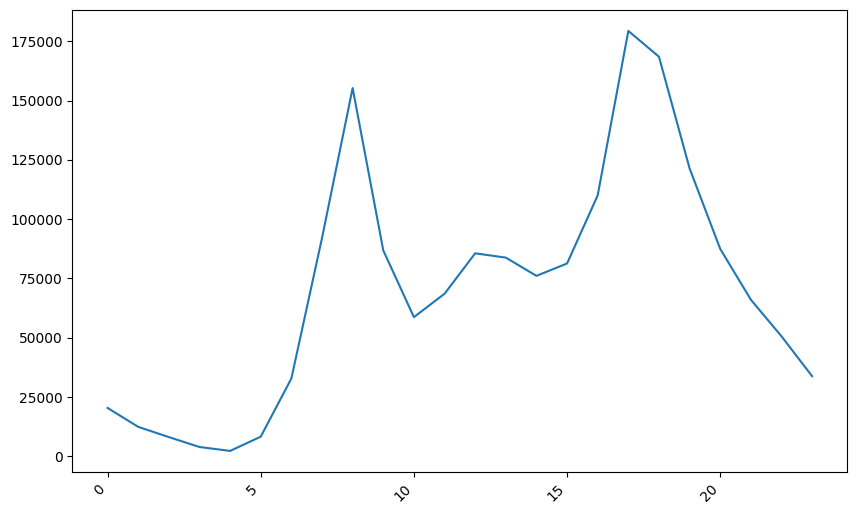

In [26]:
x = df_registered_by_hour.Hour
y = df_registered_by_hour.registered
plt.figure(figsize=(10, 6))
plt.plot(x, y);
plt.xticks(rotation=45, ha='right');